In [2]:
import jieba
import re
import numpy as np
from sklearn.decomposition import PCA
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import os 


In [3]:
dir_name="./data/csv"
file_name=os.listdir(dir_name)

csvs={f:pd.read_csv(dir_name+"/"+f,encoding="gbk") for f in file_name}
csv_2019=csvs["2019.CSV"]

In [4]:
csv_2019

,原句,分词,词频,关键词(TF-IDF),关键词(TextRank),关键词(我们的方法)
0,实践告诉我们，伟大事业都基于创新。创新决定未来。建设世界科技强国，不是一片坦途，唯有创新才能...,创新,6.0,创新,创新,创新
1,NaN,科技,3.0,科技,科技,科技
2,NaN,世界,3.0,前沿性,前沿性,发展
3,NaN,领域,2.0,世界,世界,建设
4,NaN,精神,2.0,主动仗,主动仗,国家
...,...,...,...,...,...,...
1246,NaN,关键技术,1.0,NaN,NaN,NaN
1247,NaN,先进,1.0,NaN,NaN,NaN
1248,NaN,依靠,1.0,NaN,NaN,NaN
1249,NaN,优化,1.0,NaN,NaN,NaN


In [5]:
# 创建停用词列表
stopword_file="./stopword/cn_stopwords.txt"
stopwords=[line.strip() for line in open(stopword_file, 'r',encoding='UTF-8').readlines()]

stopwords

['$',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '?',
 '_',
 '“',
 '”',
 '、',
 '。',
 '《',
 '》',
 '一',
 '一些',
 '一何',
 '一切',
 '一则',
 '一方面',
 '一旦',
 '一来',
 '一样',
 '一般',
 '一转眼',
 '万一',
 '上',
 '上下',
 '下',
 '不',
 '不仅',
 '不但',
 '不光',
 '不单',
 '不只',
 '不外乎',
 '不如',
 '不妨',
 '不尽',
 '不尽然',
 '不得',
 '不怕',
 '不惟',
 '不成',
 '不拘',
 '不料',
 '不是',
 '不比',
 '不然',
 '不特',
 '不独',
 '不管',
 '不至于',
 '不若',
 '不论',
 '不过',
 '不问',
 '与',
 '与其',
 '与其说',
 '与否',
 '与此同时',
 '且',
 '且不说',
 '且说',
 '两者',
 '个',
 '个别',
 '临',
 '为',
 '为了',
 '为什么',
 '为何',
 '为止',
 '为此',
 '为着',
 '乃',
 '乃至',
 '乃至于',
 '么',
 '之',
 '之一',
 '之所以',
 '之类',
 '乌乎',
 '乎',
 '乘',
 '也',
 '也好',
 '也罢',
 '了',
 '二来',
 '于',
 '于是',
 '于是乎',
 '云云',
 '云尔',
 '些',
 '亦',
 '人',
 '人们',
 '人家',
 '什么',
 '什么样',
 '今',
 '介于',
 '仍',
 '仍旧',
 '从',
 '从此',
 '从而',
 '他',
 '他人',
 '他们',
 '以',
 '以上',
 '以为',
 '以便',
 '以免',
 '以及',
 '以故',
 '以期',
 '以来',
 '以至',
 '以至于',
 '以致',
 '们',
 '任',
 '任何',
 '任凭',
 '似的',
 '但',
 '但凡',
 '但是',
 '何',
 '何以',
 '何况',
 '何处',
 '何时',
 '余外',
 '作为',
 '你',
 '你们'

In [6]:

# 定义函数实现分词
def cutsentences(sentences,stopwords):
    temp = jieba.lcut(sentences)  #结巴分词 精确模式
    words = []
    for i in temp:
        #过滤掉所有的标点符号
        i = re.sub("[\s+\.\!\/_,$%^*(+\"\'””《》]+|[+——！，。？、~@#￥%……&*（）：；‘]+", "", i)
        if len(i) > 1 and i not in stopwords:
            words.append(i)
    if len(words) > 0:
        return words


sample_text="天津大学，其前身为北洋大学，始建于1895年10月2日，是中国第一所现代大学，开中国近代高等教育之先河"
cutsentences(sample_text,stopwords)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\fatak\AppData\Local\Temp\jieba.cache
Loading model cost 0.492 seconds.
Prefix dict has been built successfully.


['天津大学',
 '前身',
 '北洋大学',
 '始建',
 '1895',
 '10',
 '中国',
 '第一所',
 '现代',
 '大学',
 '中国',
 '近代',
 '高等教育',
 '先河']

In [7]:
# 提取原句,并且分词
sentence_list=[]

for content in csv_2019["原句"]:
    if pd.isnull(content):
        pass
    else:
        sentence_list.append(content)


In [8]:
print(len(sentence_list))
sentence_list

29


['实践告诉我们，伟大事业都基于创新。创新决定未来。建设世界科技强国，不是一片坦途，唯有创新才能抢占先机。这次任务实现了多项创新，填补系列国际国内空白，充分体现了自主创新要敢下先手棋、善打主动仗的精神。我们要深刻把握世界科技发展大势，弘扬科学精神，瞄准战略性、基础性、前沿性领域，坚持补齐短板、跟踪发展、超前布局同步推进，努力实现关键核心技术重大突破，提升国家创新体系整体效能，不断增强科技实力和创新能力，努力在世界高技术领域占有重要一席之地。',
 '要坚持问题导向，解放思想，通过全面深化改革开放，给创新创业创造以更好的环境，着力解决影响创新创业创造的突出体制机制问题，营造鼓励创新创业创造的社会氛围，特别是要为中小企业、年轻人发展提供有利条件，为高技术企业成长建立加速机制。',
 '当前随着新一轮科技革命和产业变革孕育兴起，新能源汽车产业正进入加速发展的新阶段，不仅为各国经济增长注入强劲新动能，也有助于减少温室气体排放，应对气候变化挑战，改善全球生态环境。',
 '中国坚持走绿色、低碳、可持续发展道路，愿同国际社会一道，加速推进新能源汽车科技创新和相关产业发展，为建设清洁美丽世界、推动构建人类命运共同体作出更大贡献。希望各位嘉宾深入交流、凝聚共识，深化新能源汽车产业交流合作，让创新科技发展成果更好造福世界各国人民。',
 '当前，以互联网、大数据、人工智能等为代表的现代信息技术日新月异，新一轮科技革命和产业变革蓬勃推进，智能产业快速发展，对经济发展、社会进步、全球治理等方面产生重大而深远影响。',
 '中国高度重视智能产业发展，加快数字产业化、产业数字化，推动数字经济和实体经济深度融合。中国愿同国际社会一道，共创智能时代，共享智能成果。',
 '要坚持网络安全教育、技术、产业融合发展，形成人才培养、技术创新、产业发展的良性生态。要坚持促进发展和依法管理相统一，既大力培育人工智能、物联网、下一代通信网络等新技术新应用，又积极利用法律法规和标准规范引导新技术应用。要坚持安全可控和开放创新并重，立足于开放环境维护网络安全，加强国际交流合作，提升广大人民群众在网络空间的获得感、幸福感、安全感。',
 '黄河水资源量就这么多，搞生态建设要用水，发展经济、吃饭过日子也离不开水，不能把水当作无限供给的资源。“有多少汤泡多少馍”。要坚持以水定城、以水定地、以水定人、以水定产，把水资源

In [9]:
words_list=[]
for sentence in sentence_list:
    words_list.append(cutsentences(sentence,stopwords))


In [10]:
words_list_with_stopword=[]
for sentence in sentence_list:
    words_list_with_stopword.append(cutsentences(sentence,[]))

In [11]:

words_list_with_stopword

[['实践',
  '告诉',
  '我们',
  '伟大事业',
  '基于',
  '创新',
  '创新',
  '决定',
  '未来',
  '建设',
  '世界',
  '科技',
  '强国',
  '不是',
  '一片',
  '坦途',
  '唯有',
  '创新',
  '才能',
  '抢占',
  '先机',
  '这次',
  '任务',
  '实现',
  '多项',
  '创新',
  '填补',
  '系列',
  '国际',
  '国内',
  '空白',
  '充分体现',
  '自主',
  '创新',
  '要敢',
  '先手棋',
  '主动仗',
  '精神',
  '我们',
  '深刻',
  '把握',
  '世界',
  '科技',
  '发展',
  '大势',
  '弘扬',
  '科学',
  '精神',
  '瞄准',
  '战略性',
  '基础性',
  '前沿性',
  '领域',
  '坚持',
  '补齐',
  '短板',
  '跟踪',
  '发展',
  '超前',
  '布局',
  '同步',
  '推进',
  '努力实现',
  '关键',
  '核心技术',
  '重大突破',
  '提升',
  '国家',
  '创新',
  '体系',
  '整体',
  '效能',
  '不断',
  '增强',
  '科技',
  '实力',
  '创新能力',
  '努力',
  '世界',
  '高技术',
  '领域',
  '占有',
  '重要',
  '一席之地'],
 ['坚持',
  '问题',
  '导向',
  '解放思想',
  '通过',
  '全面',
  '深化改革',
  '开放',
  '创新',
  '创业',
  '创造',
  '更好',
  '环境',
  '着力',
  '解决',
  '影响',
  '创新',
  '创业',
  '创造',
  '突出',
  '体制',
  '机制',
  '问题',
  '营造',
  '鼓励',
  '创新',
  '创业',
  '创造',
  '社会',
  '氛围',
  '特别',
  '中小企业',
  '年轻人',
  '发展',
  '提供',
  '有利条件',
  '高技术',
 

In [67]:
x=set()
for words in words_list:
    for word in words:
        x.add(word)

len(x)

640

In [28]:
# 构造词向量
# 调用Word2Vec训练
# 参数：size: 词向量维度；window: 上下文的宽度，min_count为考虑计算的单词的最低词频阈值
model = Word2Vec(words_list,vector_size=2,epochs=50000,window=50)

KeyboardInterrupt: 

In [19]:
# 构造词向量
# 调用Word2Vec训练
# 参数：size: 词向量维度；window: 上下文的宽度，min_count为考虑计算的单词的最低词频阈值
model=Word2Vec(words_list_with_stopword,epochs=50,min_count=0)

In [22]:
epochss=[5,50,500,5000]
for epoches in epochss:
    print("训练轮数%d"%(epoches))
    model=Word2Vec(words_list_with_stopword,epochs=epoches,min_count=0)
    # print("创新的词向量：\n",model.wv.get_vector('创新'))
    print("\n和创新相关性最高的前5个词语：")
    print(model.wv.most_similar('创新', topn = 5))# 与创新最相关的前20个词语
    print("\n和科技相关性最高的前5个词语：")
    print(model.wv.most_similar('科技', topn = 5))# 与创新最相关的前20个词语

训练轮数5

和创新相关性最高的前5个词语：
[('伟大事业', 0.3730017840862274), ('鼓励', 0.22687439620494843), ('信息', 0.22455982863903046), ('实体', 0.22125297784805298), ('一片', 0.21542225778102875)]

和科技相关性最高的前5个词语：
[('中小企业', 0.296575129032135), ('不是', 0.27839168906211853), ('现代化', 0.26291513442993164), ('领导', 0.2567507326602936), ('各类', 0.23237524926662445)]
训练轮数50

和创新相关性最高的前5个词语：
[('发展', 0.9997533559799194), ('领域', 0.999713122844696), ('科技', 0.9996896982192993), ('问题', 0.999685525894165), ('各国', 0.9996816515922546)]

和科技相关性最高的前5个词语：
[('创新', 0.9996898174285889), ('产业', 0.9996665120124817), ('发展', 0.9996421933174133), ('推动', 0.9996179342269897), ('领域', 0.9995867609977722)]
训练轮数500

和创新相关性最高的前5个词语：
[('关口', 0.6182492971420288), ('历史', 0.5932259559631348), ('应该', 0.548803448677063), ('深度', 0.5225257873535156), ('集成', 0.5105774402618408)]

和科技相关性最高的前5个词语：
[('变革', 0.7222208380699158), ('蓬勃', 0.7114260792732239), ('新一轮', 0.7103675007820129), ('革命', 0.708461582660675), ('兴起', 0.6729857325553894)]
训练轮数5000

和创新相关性最高的前5个词

In [17]:
X_reduced.shape
words = set(innovate_knnwv+tech_knnwv)
words

{'产业', '创新', '发展', '各国', '推动', '科技', '问题', '领域'}

In [15]:
# 将词向量投影到二维空间
rawWordVec = []
word2ind = {}
for i, w in enumerate(model.wv.index_to_key): #index_to_key 序号,词语
    rawWordVec.append(model.wv[w]) #词向量
    word2ind[w] = i #{词语:序号}
rawWordVec = np.array(rawWordVec)
X_reduced = PCA(n_components=2).fit_transform(rawWordVec)

In [16]:
innovate_knnwv=[l[0] for l in model.wv.most_similar('科技', topn = 5)]
tech_knnwv=[l[0] for l in model.wv.most_similar('创新', topn = 5)]

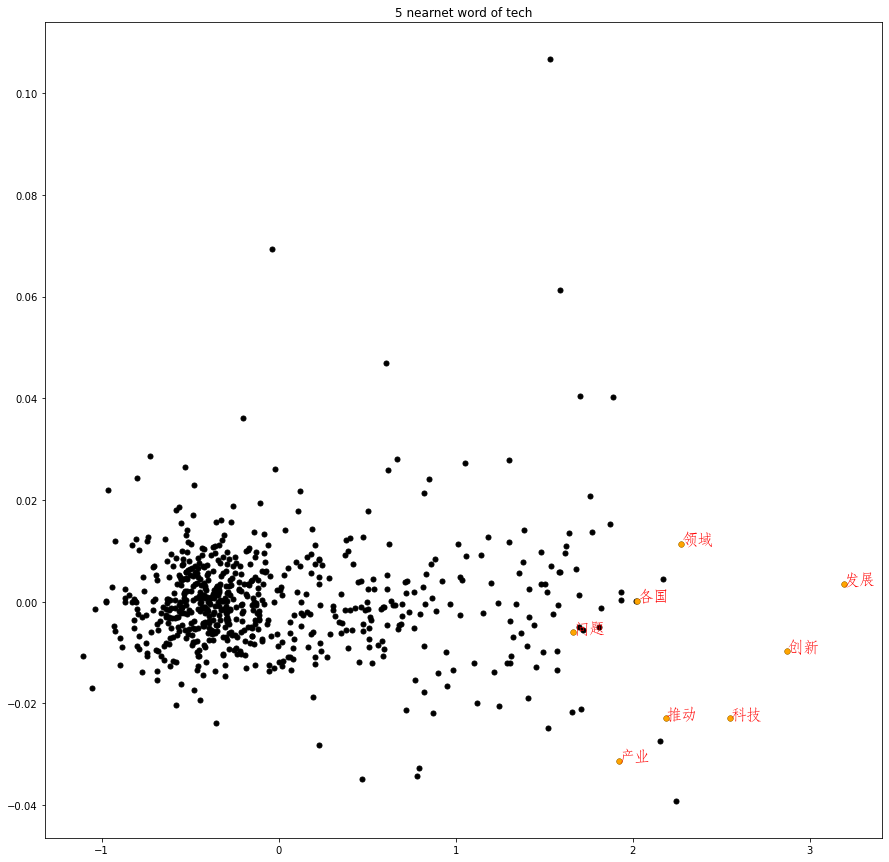

In [18]:
# 绘制星空图
# 绘制所有单词向量的二维空间投影
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
ax.set_facecolor('white')
ax.plot(X_reduced[:, 0], X_reduced[:, 1], '.', markersize = 10, alpha = 1, color = 'black')


# 绘制几个特殊单词的向量
words = set(innovate_knnwv+tech_knnwv)


# 设置中文字体 否则乱码
zhfont1 = matplotlib.font_manager.FontProperties(fname='word2evc/华文仿宋.ttf', size=16)
for w in words:
    if w in word2ind:
        ind = word2ind[w]
        xy = X_reduced[ind]
        plt.plot(xy[0], xy[1], '.', alpha =1, color = 'orange',markersize=10)
        plt.text(xy[0], xy[1], w, fontproperties = zhfont1, alpha = 1, color = 'red')

plt.title("5 nearnet word of tech")
plt.show()